# Adding the RecurrentGCN models

SEOYEON CHOI  
2023-05-27

> RecurrentGCN

# Import

In [1]:
import itstgcntry
import torch
import itstgcntry.planner 

Try

In [7]:
import pandas as pd

In [19]:
pd.read_csv('./simulation_results/2023-05-29_11-18-32.csv').groupby(['RecurrentGCN','method','mrate'])['mse'].mean().reset_index()

In [20]:
pd.read_csv('./simulation_results/2023-05-29_12-31-06.csv').groupby(['RecurrentGCN','method','mrate'])['mse'].mean().reset_index()

# GConvGRU

In [2]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [3]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [4]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

/home/csy/Dropbox/blog/posts/GCN/itstgcntry/utils.py:72: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343998658/work/torch/csrc/utils/tensor_new.cpp:245.)
  lags = torch.tensor(train_dataset.features).shape[-1]

In [5]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [6]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [7]:
model = itstgcntry.GConvGRU_RecurrentGCN(train_dataset_padded,filters=1)

In [8]:
lrnr.learn(model,epoch=5)

5/5

In [9]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [10]:
model1 = itstgcntry.GConvGRU_RecurrentGCN(train_dataset_padded,filters=1)

In [11]:
lrnr1.learn(model1,epoch=5)

5/5

`-` 적합값

In [12]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [13]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

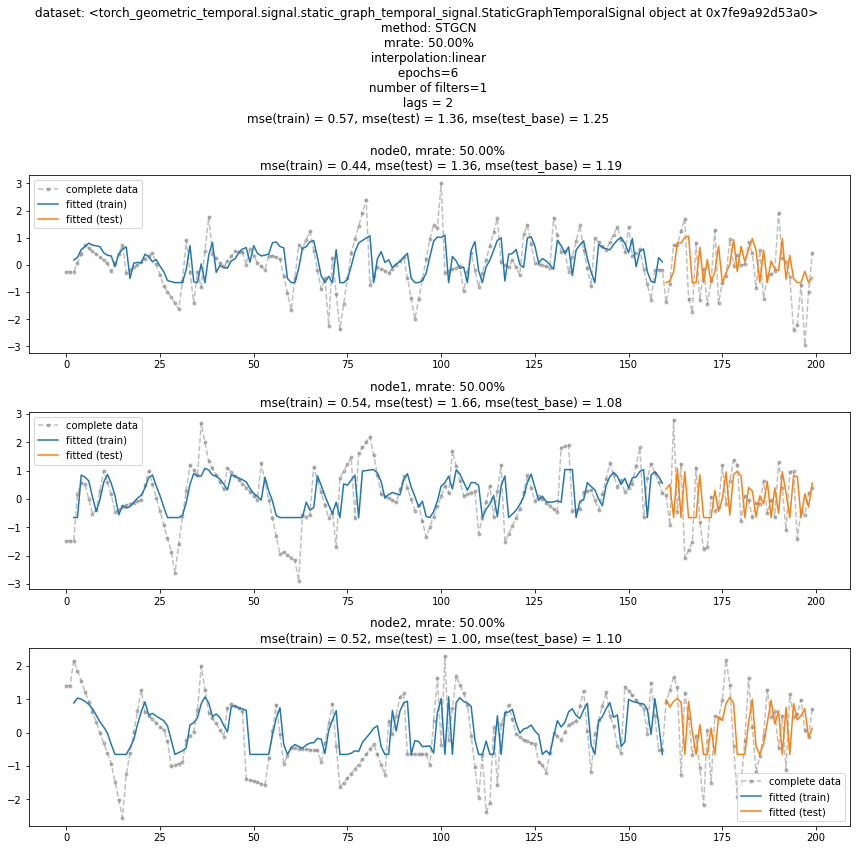

In [14]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [15]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

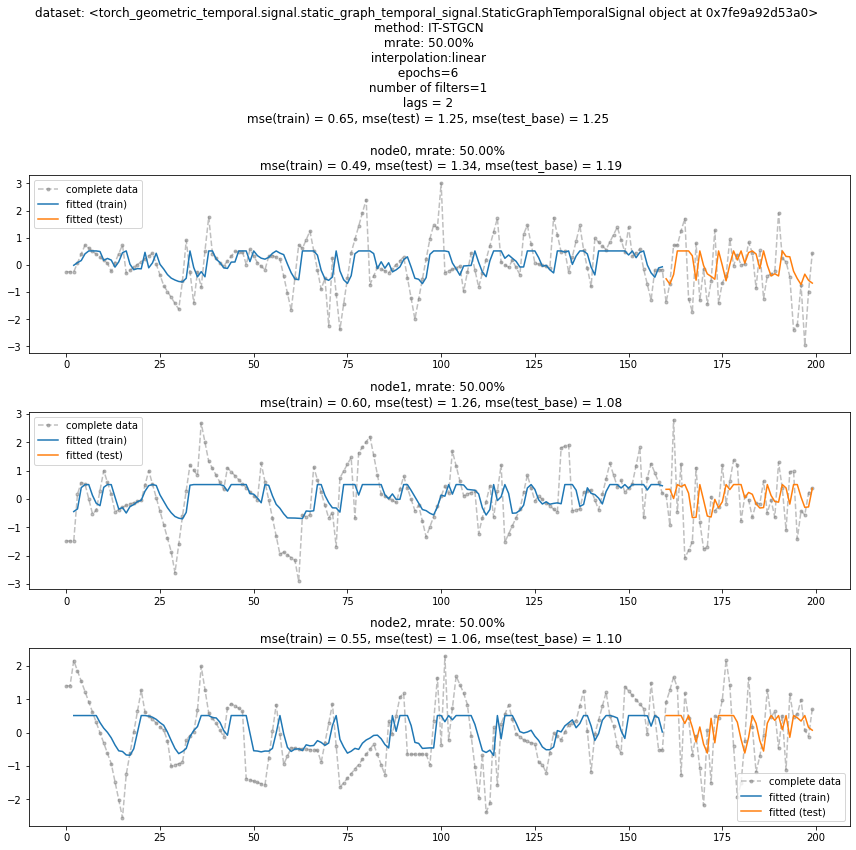

In [16]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

# DCRNN

In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [ ]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [16]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [17]:
model = itstgcntry.DCRNN_RecurrentGCN(train_dataset_padded,filters=1)

In [18]:
lrnr.learn(model,epoch=50)

50/50

In [19]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [20]:
model1 = itstgcntry.DCRNN_RecurrentGCN(train_dataset_padded,filters=1)

In [21]:
lrnr1.learn(model1,epoch=50)

50/50

`-` 적합값

In [22]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [23]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

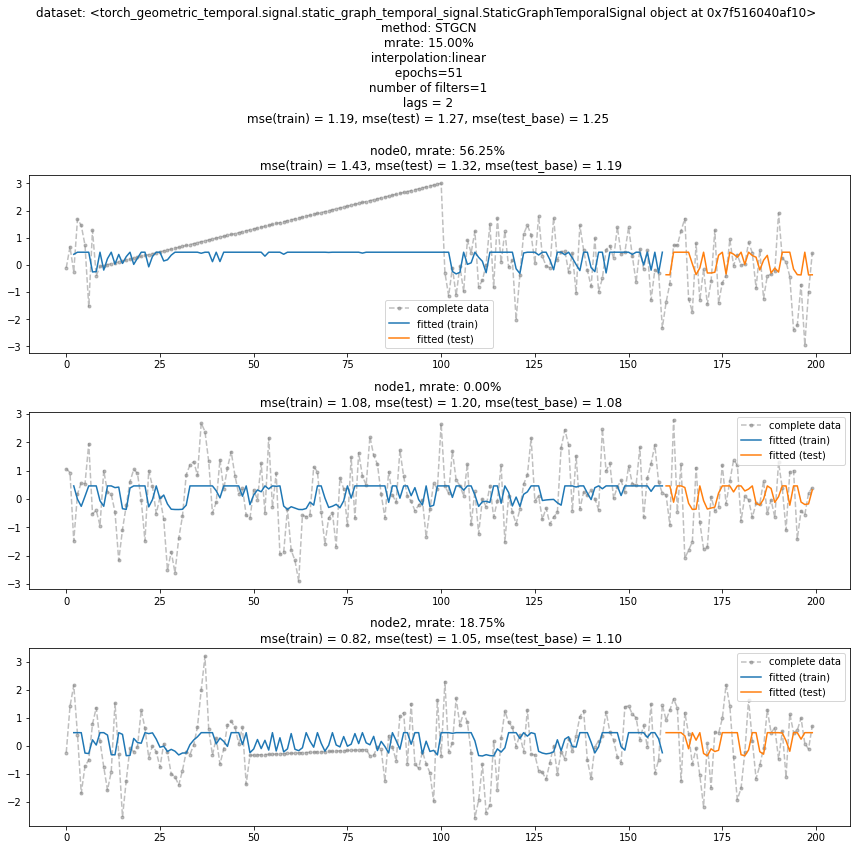

In [24]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [25]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

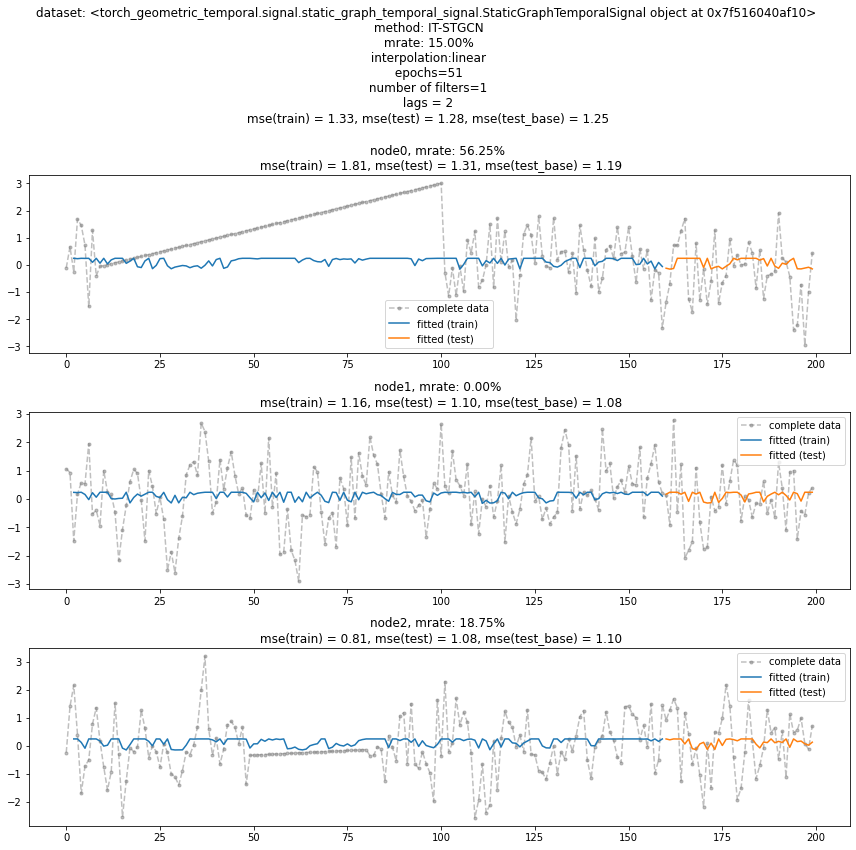

In [26]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

# EvolveGCNH

In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [ ]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [27]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [28]:
model = itstgcntry.EvolveGCNH_RecurrentGCN(train_dataset_padded)

In [29]:
lrnr.learn(model,epoch=50)

50/50

In [30]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [31]:
model1 = itstgcntry.EvolveGCNH_RecurrentGCN(train_dataset_padded)

In [32]:
lrnr1.learn(model1,epoch=50)

50/50

`-` 적합값

In [33]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [34]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

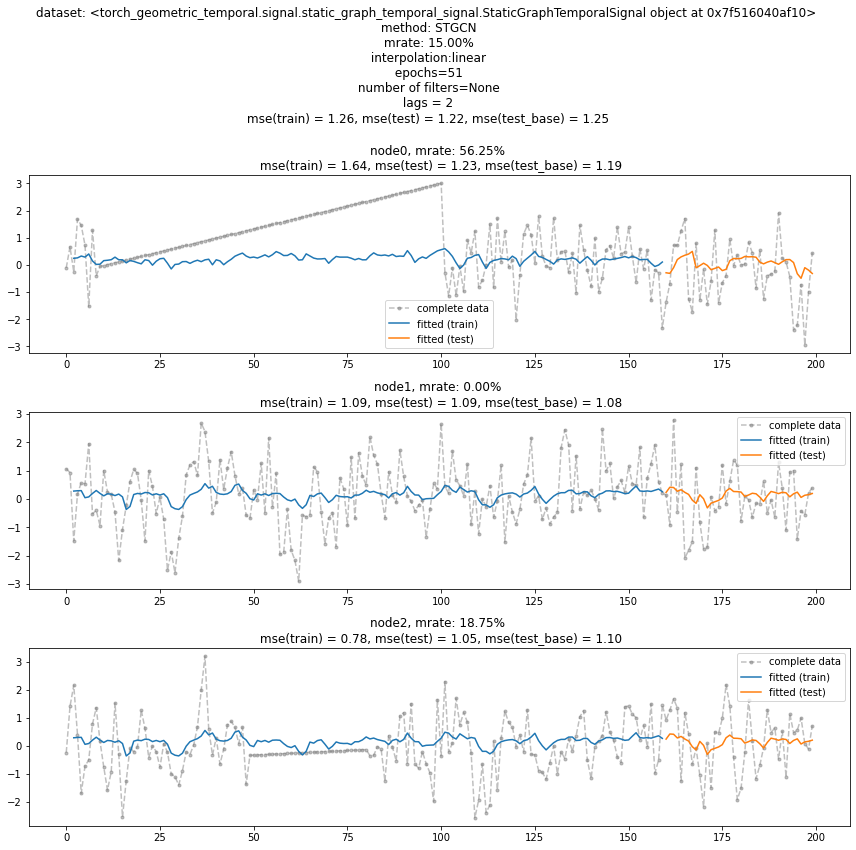

In [35]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [36]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

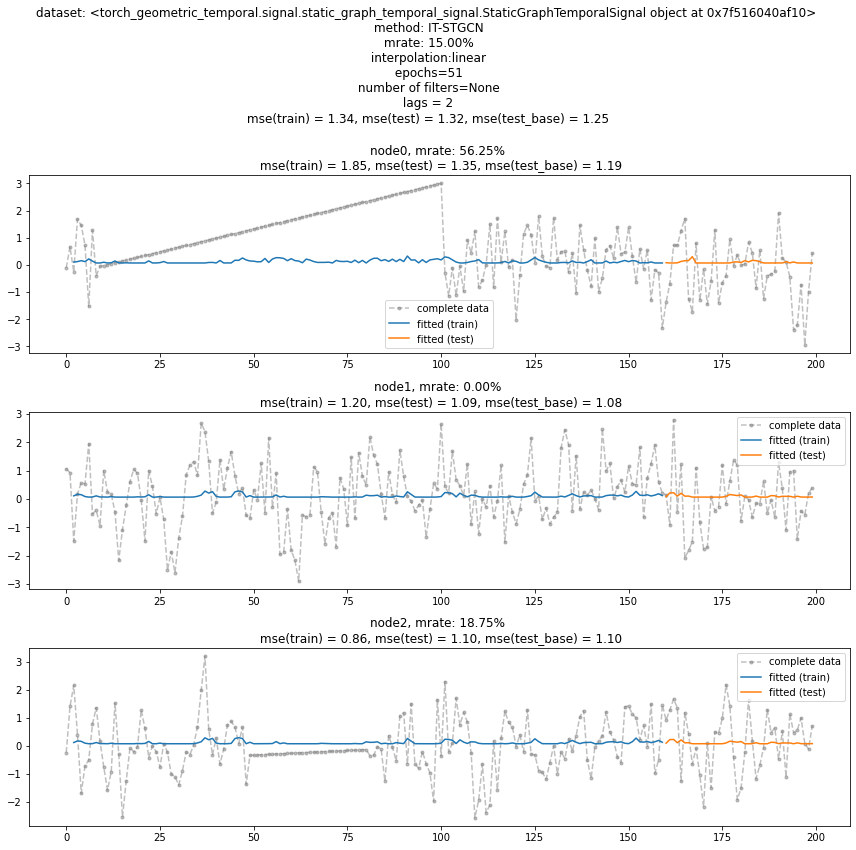

In [37]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

# EvolveGCNO

In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [ ]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [38]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [39]:
model = itstgcntry.EvolveGCNO_RecurrentGCN(train_dataset_padded)

In [40]:
lrnr.learn(model,epoch=50)

50/50

In [41]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [42]:
model1 = itstgcntry.EvolveGCNO_RecurrentGCN(train_dataset_padded)

In [43]:
lrnr1.learn(model1,epoch=50)

50/50

`-` 적합값

In [44]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [45]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

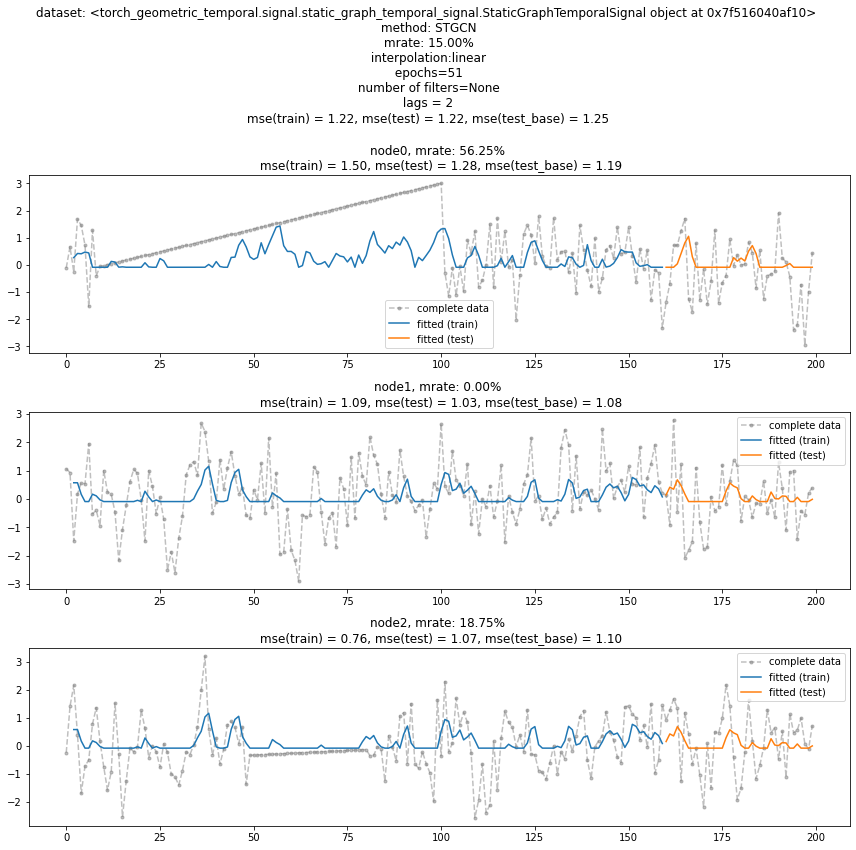

In [46]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [47]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

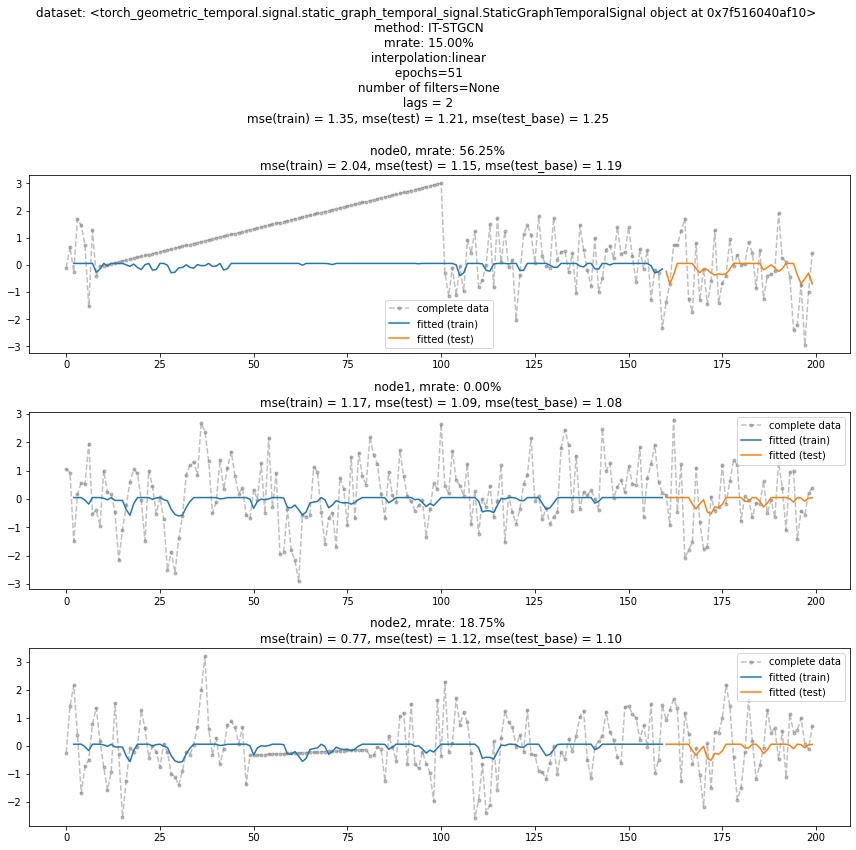

In [48]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

# GCLSTM

In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [ ]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [49]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [50]:
model = itstgcntry.GCLSTM_RecurrentGCN(train_dataset_padded, filters=1)

In [51]:
lrnr.learn(model,epoch=50)

50/50

In [52]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [53]:
model1 = itstgcntry.GCLSTM_RecurrentGCN(train_dataset_padded, filters=1)

In [54]:
lrnr1.learn(model1,epoch=50)

50/50

`-` 적합값

In [55]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [56]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

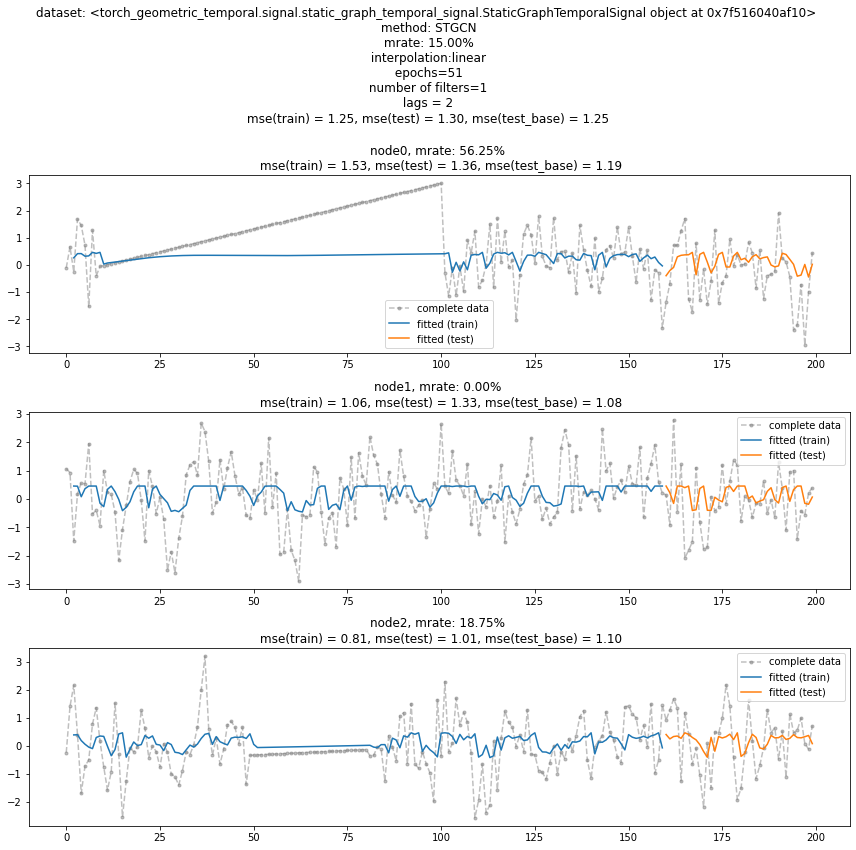

In [57]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [58]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

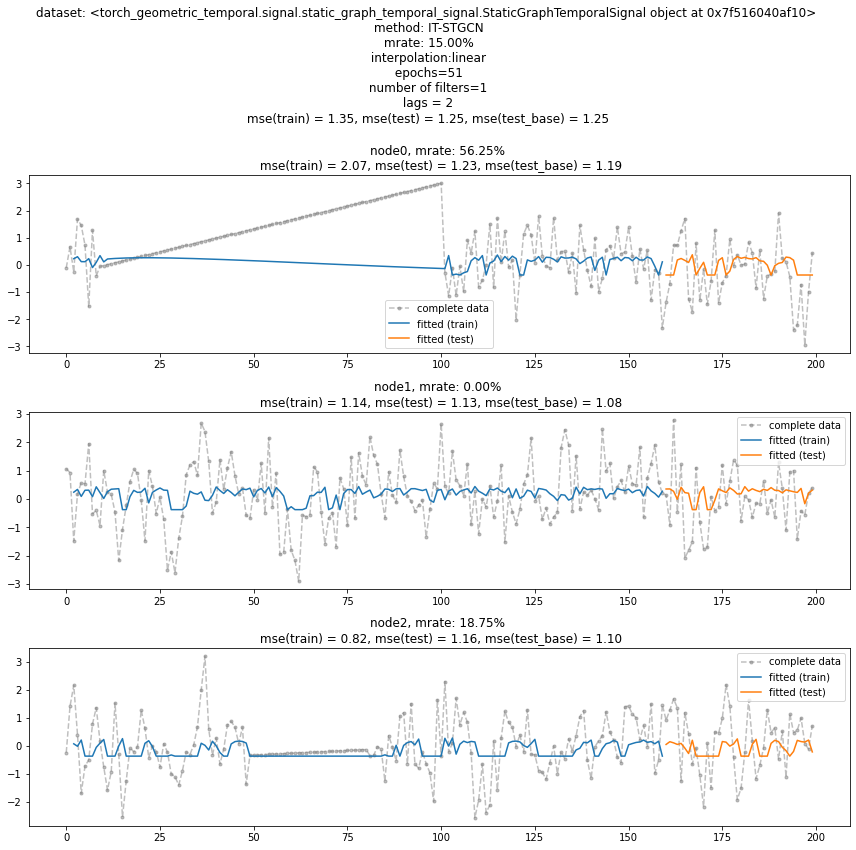

In [59]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

# GConvLSTM

In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [ ]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [60]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [61]:
model = itstgcntry.GConvLSTM_RecurrentGCN(train_dataset_padded, filters=1)

In [62]:
lrnr.learn(model,epoch=50)

50/50

In [63]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [64]:
model1 = itstgcntry.GConvLSTM_RecurrentGCN(train_dataset_padded, filters=1)

In [65]:
lrnr1.learn(model1,epoch=50)

50/50

`-` 적합값

In [66]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [67]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

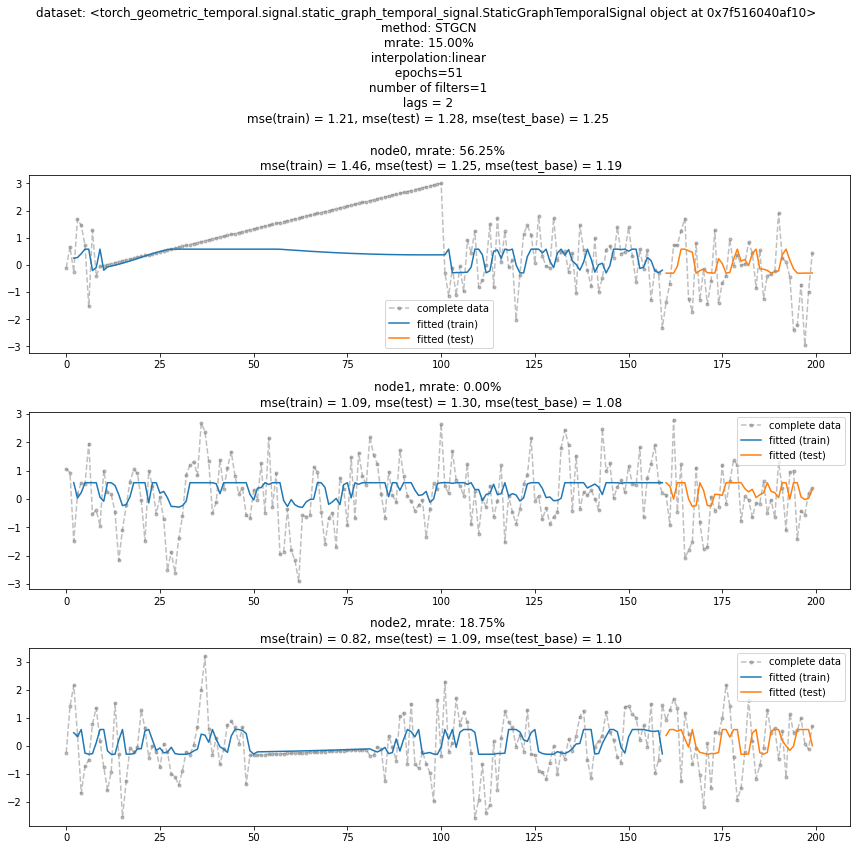

In [68]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [69]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

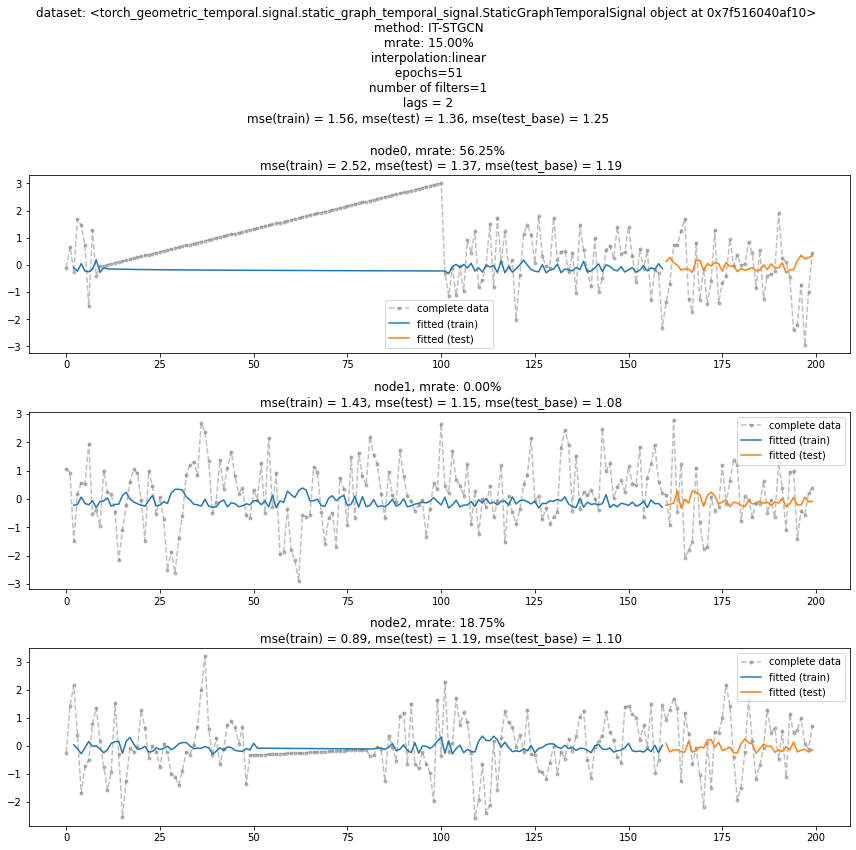

In [70]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

# LRGCN

In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [ ]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [71]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [72]:
model = itstgcntry.LRGCN_RecurrentGCN(train_dataset_padded, filters=1)

In [73]:
lrnr.learn(model,epoch=50)

50/50

In [74]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [75]:
model1 = itstgcntry.LRGCN_RecurrentGCN(train_dataset_padded, filters=1)

In [76]:
lrnr1.learn(model1,epoch=50)

50/50

`-` 적합값

In [77]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [78]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

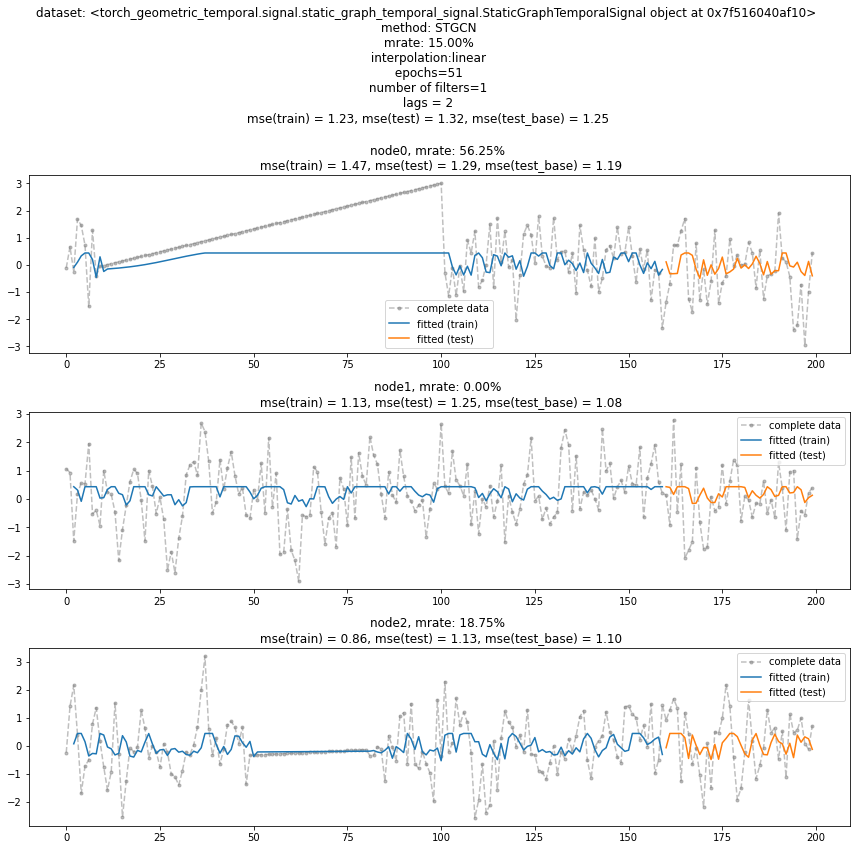

In [79]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [80]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

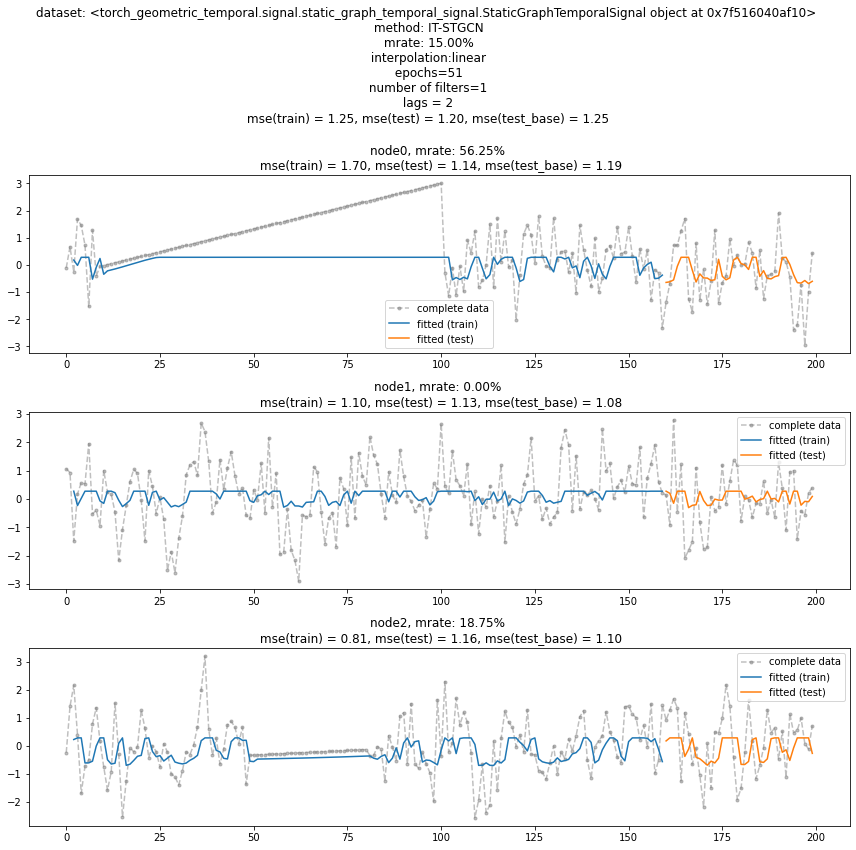

In [81]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

# MPNNLSTM

In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [ ]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [82]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [83]:
model = itstgcntry.MPNNLSTM_RecurrentGCN(train_dataset_padded, filters=1)

In [84]:
lrnr.learn(model,epoch=50)

50/50

In [85]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [86]:
model1 = itstgcntry.MPNNLSTM_RecurrentGCN(train_dataset_padded, filters=1)

In [87]:
lrnr1.learn(model1,epoch=50)

50/50

`-` 적합값

In [88]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [89]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

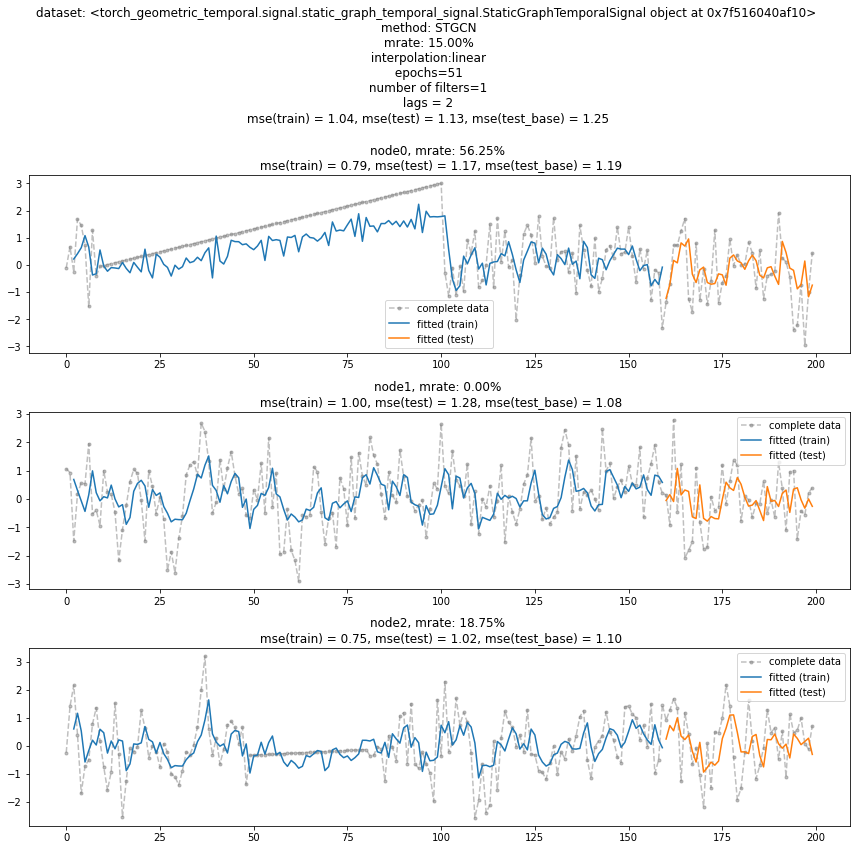

In [90]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [91]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

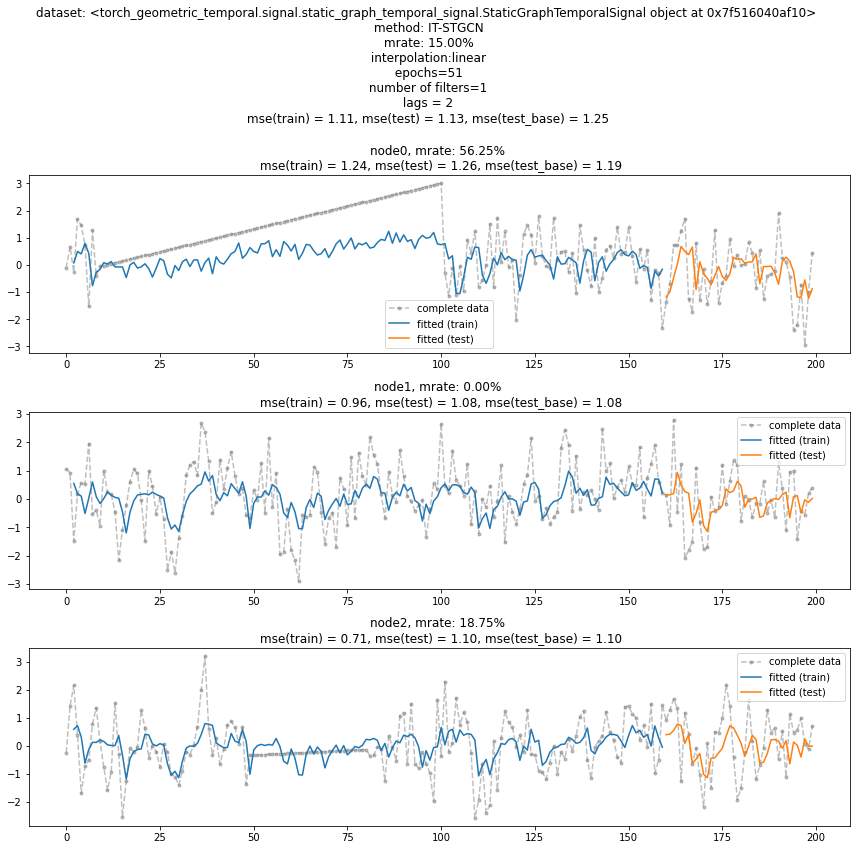

In [92]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

# TGCN

In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [ ]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [8]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [9]:
model = itstgcntry.TGCN_RecurrentGCN(train_dataset_padded, filters=32)

In [10]:
lrnr.learn(model,epoch=50)

50/50

In [11]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [12]:
model1 = itstgcntry.TGCN_RecurrentGCN(train_dataset_padded, filters=32)

In [13]:
lrnr1.learn(model1,epoch=50)

50/50

`-` 적합값

In [14]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [15]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

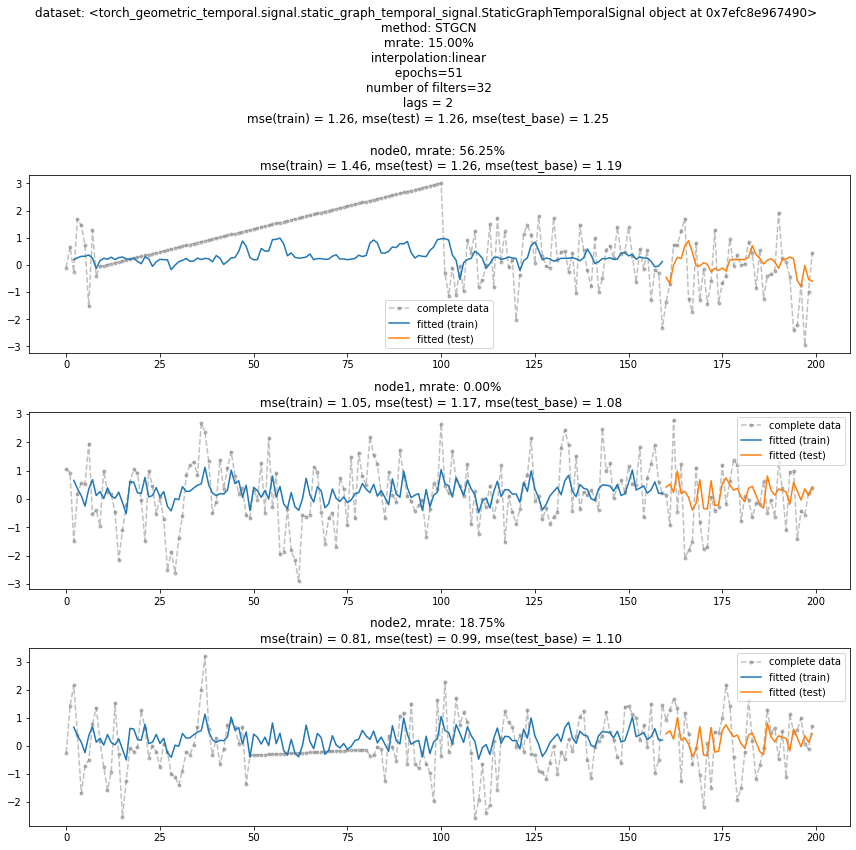

In [16]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig

In [17]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

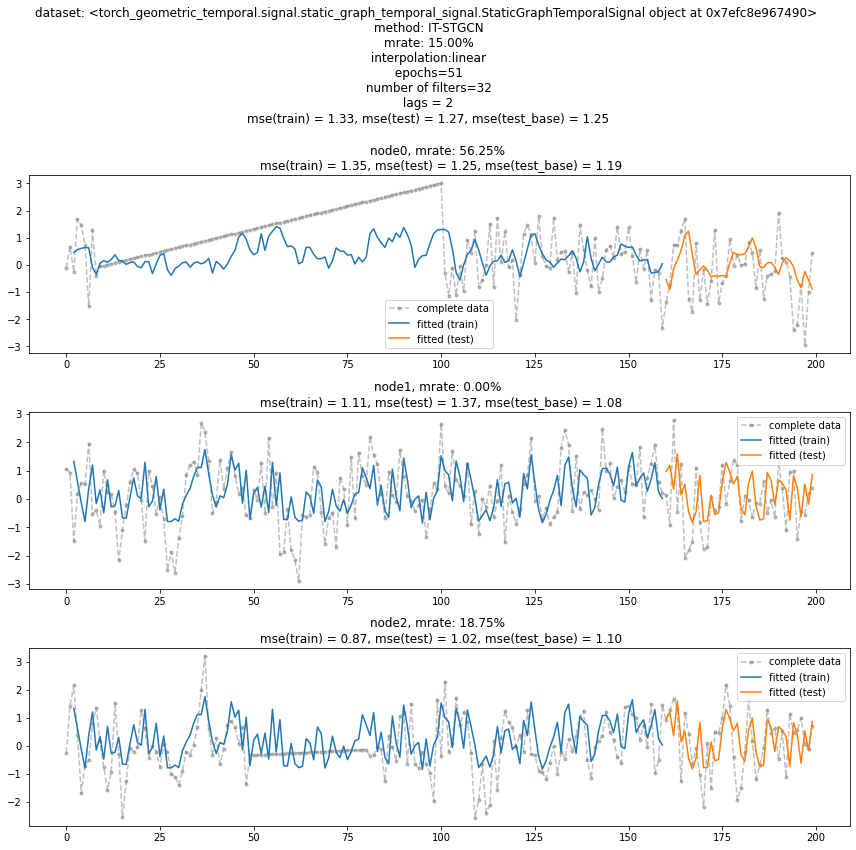

In [18]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig